In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib import cm
from matplotlib.dates import YearLocator, MonthLocator
from hmmlearn import hmm

## APPLE

In [130]:
data_aapl= pd.read_csv("Financial-Data/stocks/AAPL.csv")
data_aapl = data_aapl.dropna()
data_aapl.head()
len(data_aapl)

5146

In [131]:
day = pd.to_datetime(data_aapl['Date'][1:])
#day = data_aapl['Date'][1:]
close_diff = np.diff(np.log(data_aapl['Close']))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


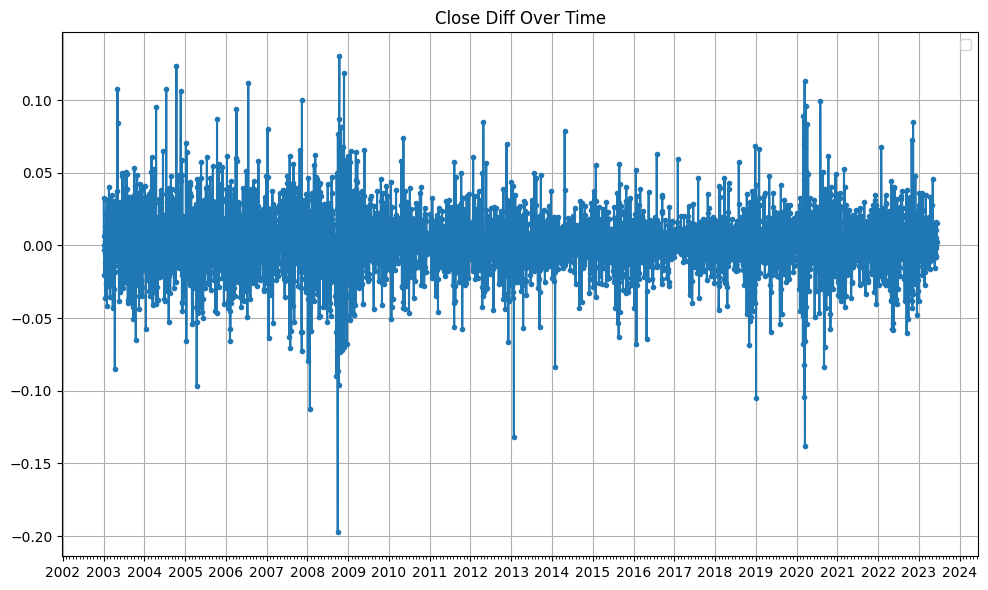

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed


ax.plot_date(day, close_diff, ".-")
    
ax.set_title("Close Diff Over Time")
    
    # Format the ticks
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator())
ax.grid(True)

# Add legend
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [133]:
hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100).fit(close_diff.reshape(-1,1))
hidden_states = hmm_model.predict(close_diff.reshape(-1,1))

In [134]:
print("Transition matrix")
print(hmm_model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(hmm_model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", hmm_model.means_[i])
    print("var = ", np.diag(hmm_model.covars_[i]))
    print()



Transition matrix
[[0.92684338 0.07315662]
 [0.03668288 0.96331712]]

Means and vars of each hidden state
0th hidden state
mean =  [0.00010499]
var =  [0.0009808]

1th hidden state
mean =  [0.00186177]
var =  [0.00018153]



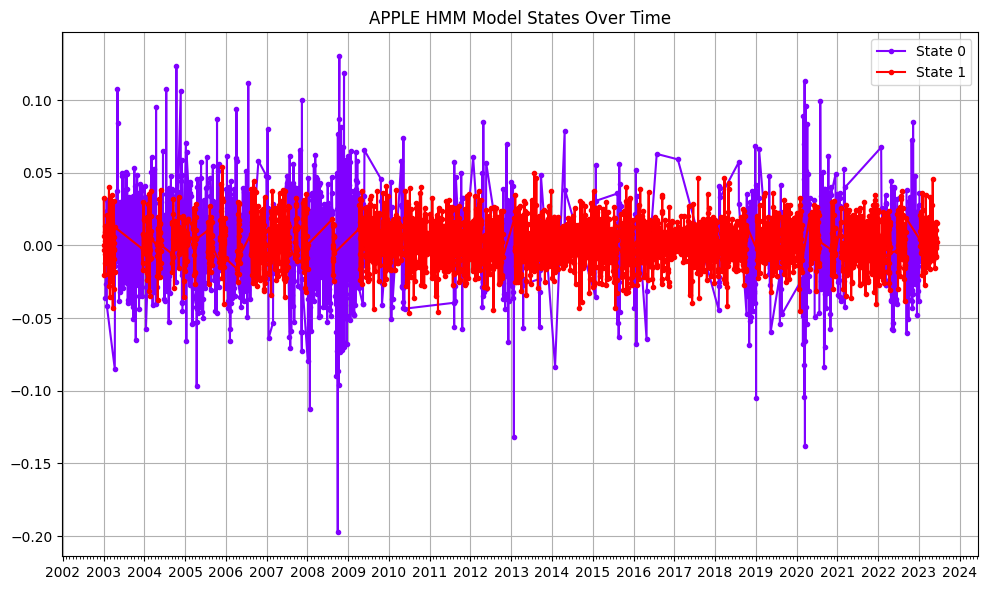

In [135]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Generate colors based on the number of components in the HMM model
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))

for i, colour in enumerate(colours):
    # Filter data for the current state
    mask = hidden_states == i
    ax.plot_date(day[mask], close_diff[mask], ".-", c=colour, label=f"State {i}")
    
    # Optionally, set the title for the plot
    ax.set_title("APPLE HMM Model States Over Time")
    
    # Format the ticks
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)

# Add legend
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

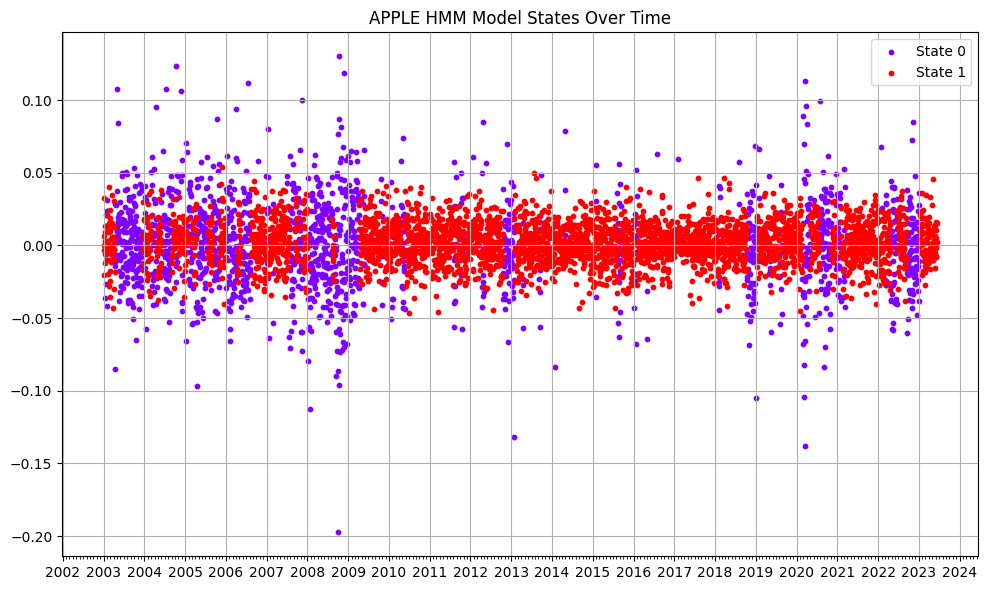

In [136]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Assuming day, close_diff, and hidden_states are defined elsewhere in your code
# Generate colors based on the number of components in the HMM model
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))

for i, colour in enumerate(colours):
    # Filter data for the current state
    mask = hidden_states == i
    ax.scatter(day[mask], close_diff[mask], color=colour, s=10, label=f"State {i}")  # Adjust the s parameter to control marker size
    
    # Optionally, set the title for the plot
    ax.set_title("APPLE HMM Model States Over Time")
    
    # Format the ticks
    ax.grid(True)
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())


# Add legend
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

## MICROSOFT

In [137]:
data_msft= pd.read_csv("Financial-Data/stocks/MSFT.csv")

#last 2000 rows
data_msft = data_msft[-2000:]

In [138]:
data_msft['Date'] = pd.to_datetime(data_msft['Date'])
data_msft['Close_diff'] = (np.log(data_msft['Close'])).diff()
#filling NA values with the previous value of the column
data_msft['Close_diff'] = data_msft['Close_diff'].fillna(method='bfill')

/tmp/ipykernel_152406/575842977.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_msft['Close_diff'] = data_msft['Close_diff'].fillna(method='bfill')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


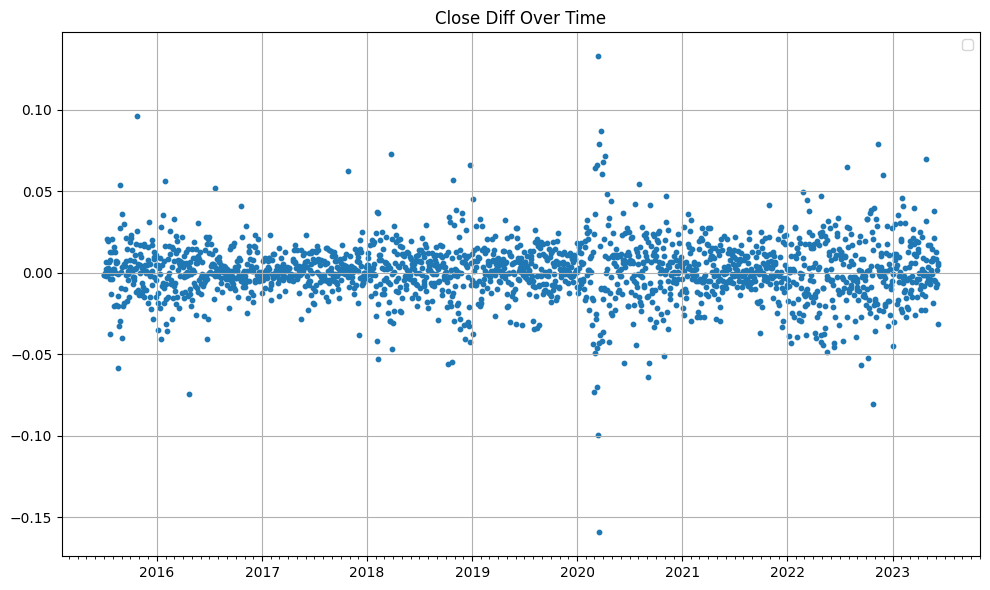

In [139]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed


ax.scatter(data_msft['Date'], data_msft['Close_diff'], s=10)
    
ax.set_title("Close Diff Over Time")
    
    # Format the ticks
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator())
ax.grid(True)

# Add legend
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [140]:
X_msft=data_msft[['Close_diff']].to_numpy()
hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100).fit(X_msft)
hidden_states = hmm_model.predict(X_msft)

2000
2000


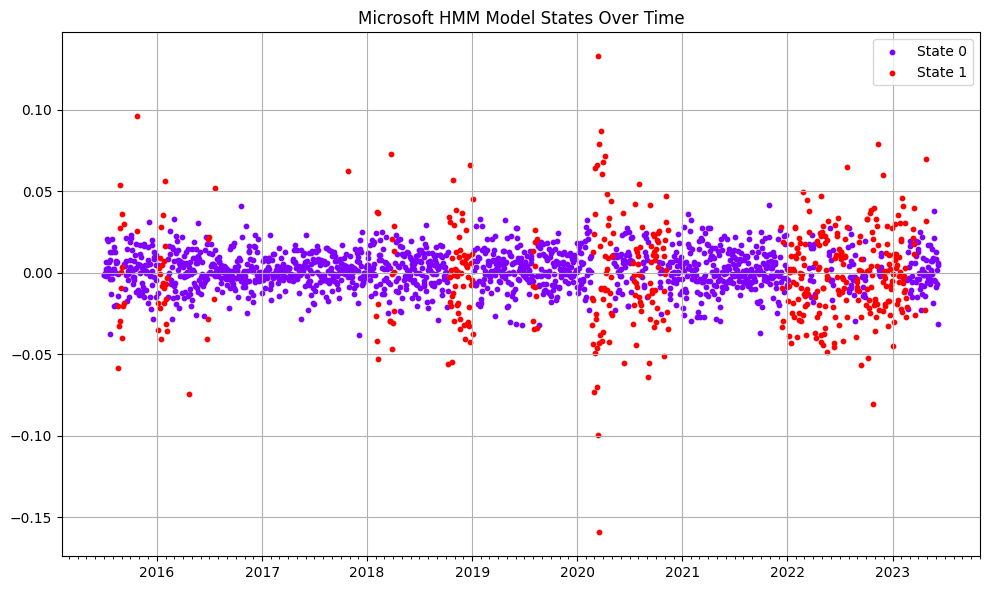

In [143]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Assuming day, close_diff, and hidden_states are defined elsewhere in your code
# Generate colors based on the number of components in the HMM model
colours = cm.rainbow(np.linspace(0, 1, hmm_model.n_components))
print(len(data_msft['Date']))
print(len( data_msft['Close_diff']))
for i, colour in enumerate(colours):
    # Filter data for the current state
    mask = hidden_states == i
    ax.scatter(data_msft['Date'][mask], data_msft['Close_diff'][mask], color=colour, s=10, label=f"State {i}")  # Adjust the s parameter to control marker size
    
    # Optionally, set the title for the plot
    ax.set_title("Microsoft HMM Model States Over Time")
    
    # Format the ticks
    ax.grid(True)
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())


# Add legend
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

normalized data

In [148]:
data_msft.index=data_msft["Date"]
# We normalize the log price, so the model can learn better.
close_diff_msft_norm= (data_msft["Close_diff"] - np.mean(data_msft["Close_diff"] )) / np.std(data_msft["Close_diff"] )
#at the end ad 1 to the end of the array
data_msft['close_diff_msft_norm'] = close_diff_msft_norm

model_normalized = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 100, random_state = 2)

# Fitting the model: The transition matrix and emission probabilities are learned by maximum likelihood.
X_msft = data_msft[['close_diff_msft_norm']].to_numpy()
model_normalized.fit(X_msft)

GaussianHMM(n_components=2, n_iter=100, random_state=2)


Gaussian distribution means:
[[ 0.04220793]
 [-0.07013257]]

Gaussian distribution covariances:
[[[0.3014145 ]]

 [[2.15291554]]]

Start probabilities:
[1. 0.]

Transition matrix:
[[0.95 0.05]
 [0.08 0.92]]


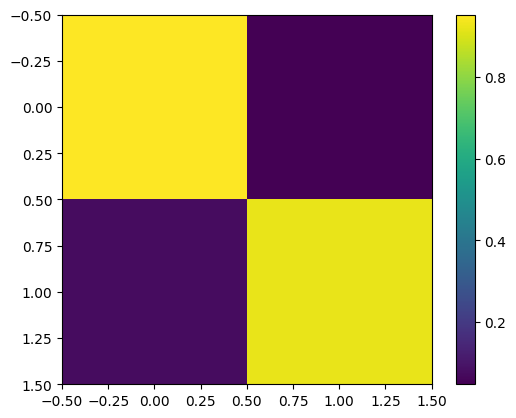

In [149]:
print("\nGaussian distribution means:")
print(model_normalized.means_)

print("\nGaussian distribution covariances:")
print(model_normalized.covars_)

print("\nStart probabilities:")
print(np.round(model_normalized.startprob_, 2))

print("\nTransition matrix:")
print(np.round(model_normalized.transmat_,2))

_ = plt.imshow(model_normalized.transmat_)
_ = plt.colorbar()

In [150]:
Z = model_normalized.predict(X_msft) # Find most probable hidden states sequence
Z_prob = model_normalized.predict_proba(X_msft)  # Find posterior for each hidden state

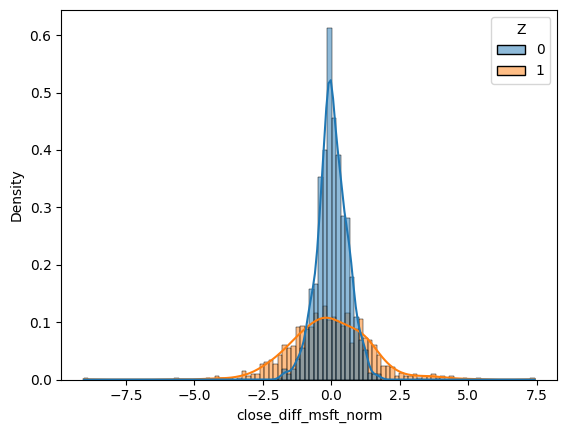

In [151]:
import seaborn as sns
#add to Z a 1 at the end

data_msft['Z'] = Z
_ = sns.histplot(data=data_msft, x='close_diff_msft_norm', hue='Z', bins=100, kde=True, stat = "density")

In [ ]:
print(len(data_msft['Z']))

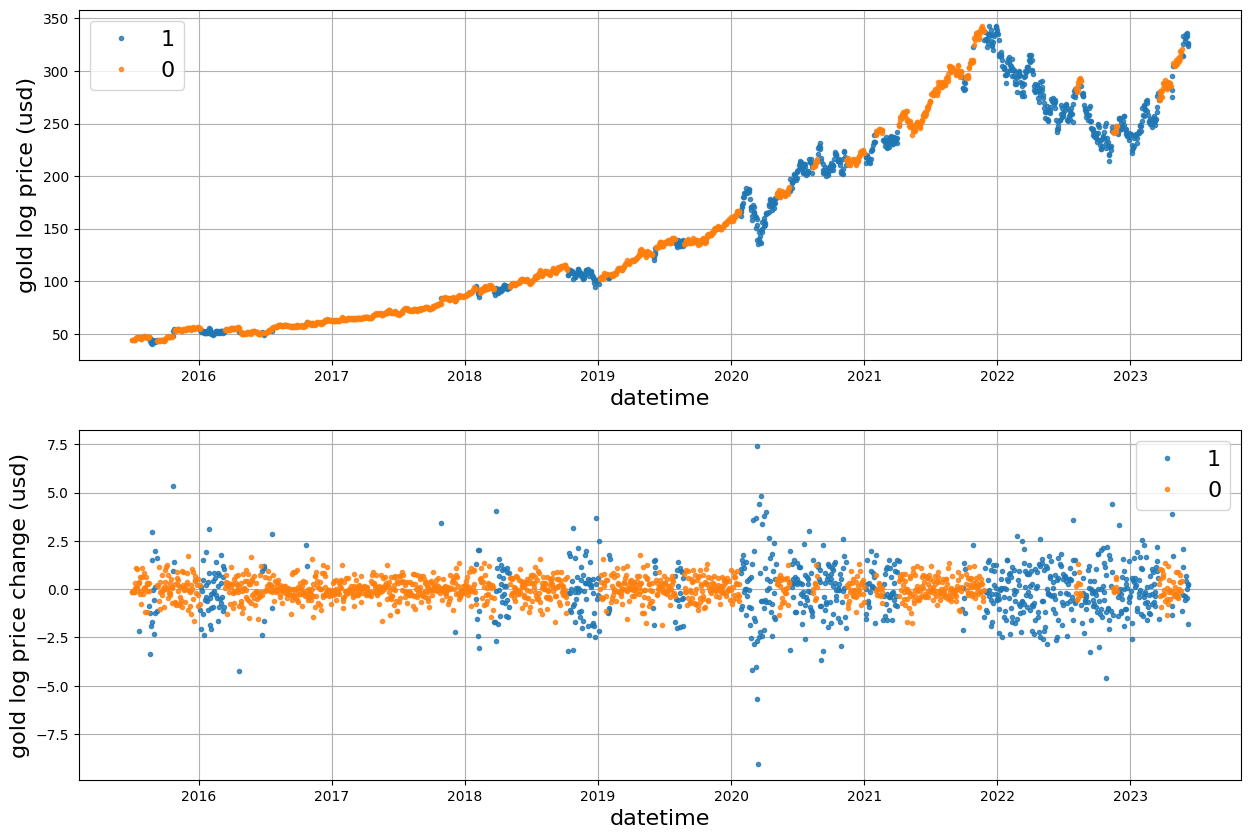

In [152]:
plt.figure(figsize = (15, 10))

STATES = np.unique(Z)[::-1]

plt.subplot(2,1,1)
for i in STATES:
    want = (Z == i)
    x = data_msft["Date"][want]
    y = data_msft["Close"][want]
    plt.plot(x, y, '.', alpha = 0.8)
plt.legend(STATES, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold log price (usd)", fontsize=16)

plt.subplot(2,1,2)
for i in STATES:
    want = (Z == i)
    x = data_msft["Date"][want]
    y = data_msft["close_diff_msft_norm"].iloc[want]
    plt.plot(x, y, '.', alpha = 0.8)
plt.legend(STATES, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold log price change (usd)", fontsize=16)
plt.show()